# Dask

`Dask` - библиотека для параллельных вычислений на `Python`.  Основные компоненты: 
- распределенное выполнение задач на кластере
- коллекции для "больших данных", которые сохраняют общие принципы API `NumPy` и `Pandas`

### Futures



In [1]:
import dask 
from dask.distributed import Client

def inc(x: int) -> int:
    return x + 1

def add(x: int, y: int) -> int:
    return x + y

client = Client()

fut = client.submit(add, 2, 3)
fut.result()

5

In [2]:
futures = client.map(inc, [2, 3, 5])
client.gather(futures)

[3, 4, 6]

### Delayed

In [3]:

def inc(x: int) -> int:
    return x + 1

def add(x: int, y: int) -> int:
    return x + y

x = dask.delayed(inc)(1)
y = dask.delayed(inc)(2)
z = dask.delayed(add)(x, y)
z.compute()

5

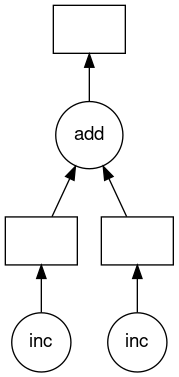

In [4]:
z.visualize()

### Arrays

<img src="https://docs.dask.org/en/latest/_images/dask-array.svg" width="400">

Поддерживает:

- базовые математические операции:  +, *, exp и т.д.
- базовые комулятивные операции над срезами и осями: sum(), mean(), std() и т.д.
- базовые матричные операции: умножение и т.д.
- операции над осями: транспонирование и т.д.
- взятие срезов: x[:100, 500:100:-2]
- некоторые алгоритмы линейной алгебры: svd, qr и т.д.

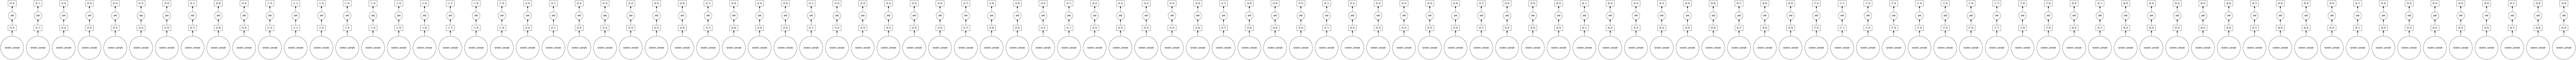

In [5]:
import dask.array as da

x = da.random.random((100, 100), chunks=(10, 10))
(x + x).compute()

(x + x).visualize()

### DataFrames

<img src="https://docs.dask.org/en/latest/_images/dask-dataframe.svg" width="400">

Поддерживает базовые операции в стиле `Pandas`

In [6]:
import dask.dataframe as dd

df = dd.read_csv("../data/currencies.csv")
df


,DATE,EUR,USD,GBP
npartitions=1,,,,
,string,float64,float64,float64
,...,...,...,...


In [7]:
df.compute()

,DATE,EUR,USD,GBP
0,2017-04-01,59.8107,55.9606,69.7605
1,2017-04-04,59.8953,56.1396,70.3429
2,2017-04-05,60.2427,56.5553,70.3548
3,2017-04-06,59.6948,55.8940,69.4986
4,2017-04-07,60.0827,56.4369,70.3655
5,2017-04-08,60.5687,56.9201,70.9281
6,2017-04-11,60.7469,57.3896,71.1746
7,2017-04-12,60.3042,56.9552,70.7384
8,2017-04-13,60.2631,56.7556,70.9502
9,2017-04-14,60.2867,56.6019,71.0467


### Bag

Реализует распределенную неупорядоченную коллекцию из обычных питоновских объектов с операциями вида `map`, `filter`, `fold` и `groupby`

In [8]:
import dask.bag as db

b = db.from_sequence([1, 2, 3, 4, 5], npartitions=2)
b.map(lambda x: x + 1).compute()

[2, 3, 4, 5, 6]